In [1]:
from sympy import var
from sympy import solve
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
from matplotlib import pyplot as plt

# Here we try to replicate what was done in the stackoverflow link

In [2]:
from scipy.optimize import fsolve

In [3]:
def vectorfield(w, p):
    """
    Defines the differential equations for the Homeostatic Expansion Project.
    We will use fsolve to try to find the where the R, N, T, and I populations lie when they reach equilibrium.
    It tries to find when:
        dRdt(I,R) = 0
        dNdt(N,R) = 0
        dTdt(R,I,T) = 0
        dTdt(T,R,I) = 0
    For the values of R, N, T, I
    We are looking for the roots

    Arguments:
        w :  vector of the state variables:
                  w = [R, N, T, I]
        p :  vector of the parameters:
                  p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    """
    R, N, T, I = w #Values here should be from the steady states found earlier
    alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d = p
   
    Rf = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    Nf = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N
    Tf = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    If = d*T - e_T*I*T - e_R*I*R - f*I   
         
    return [Rf, Nf, Tf, If]

# Testing out the Naive Production Rate

In [4]:
# A grid of d points to evaluate
dMin = 0.001;
dMax = 0.1; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    d = i #Current value of the d parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

NameError: name 'alpha' is not defined

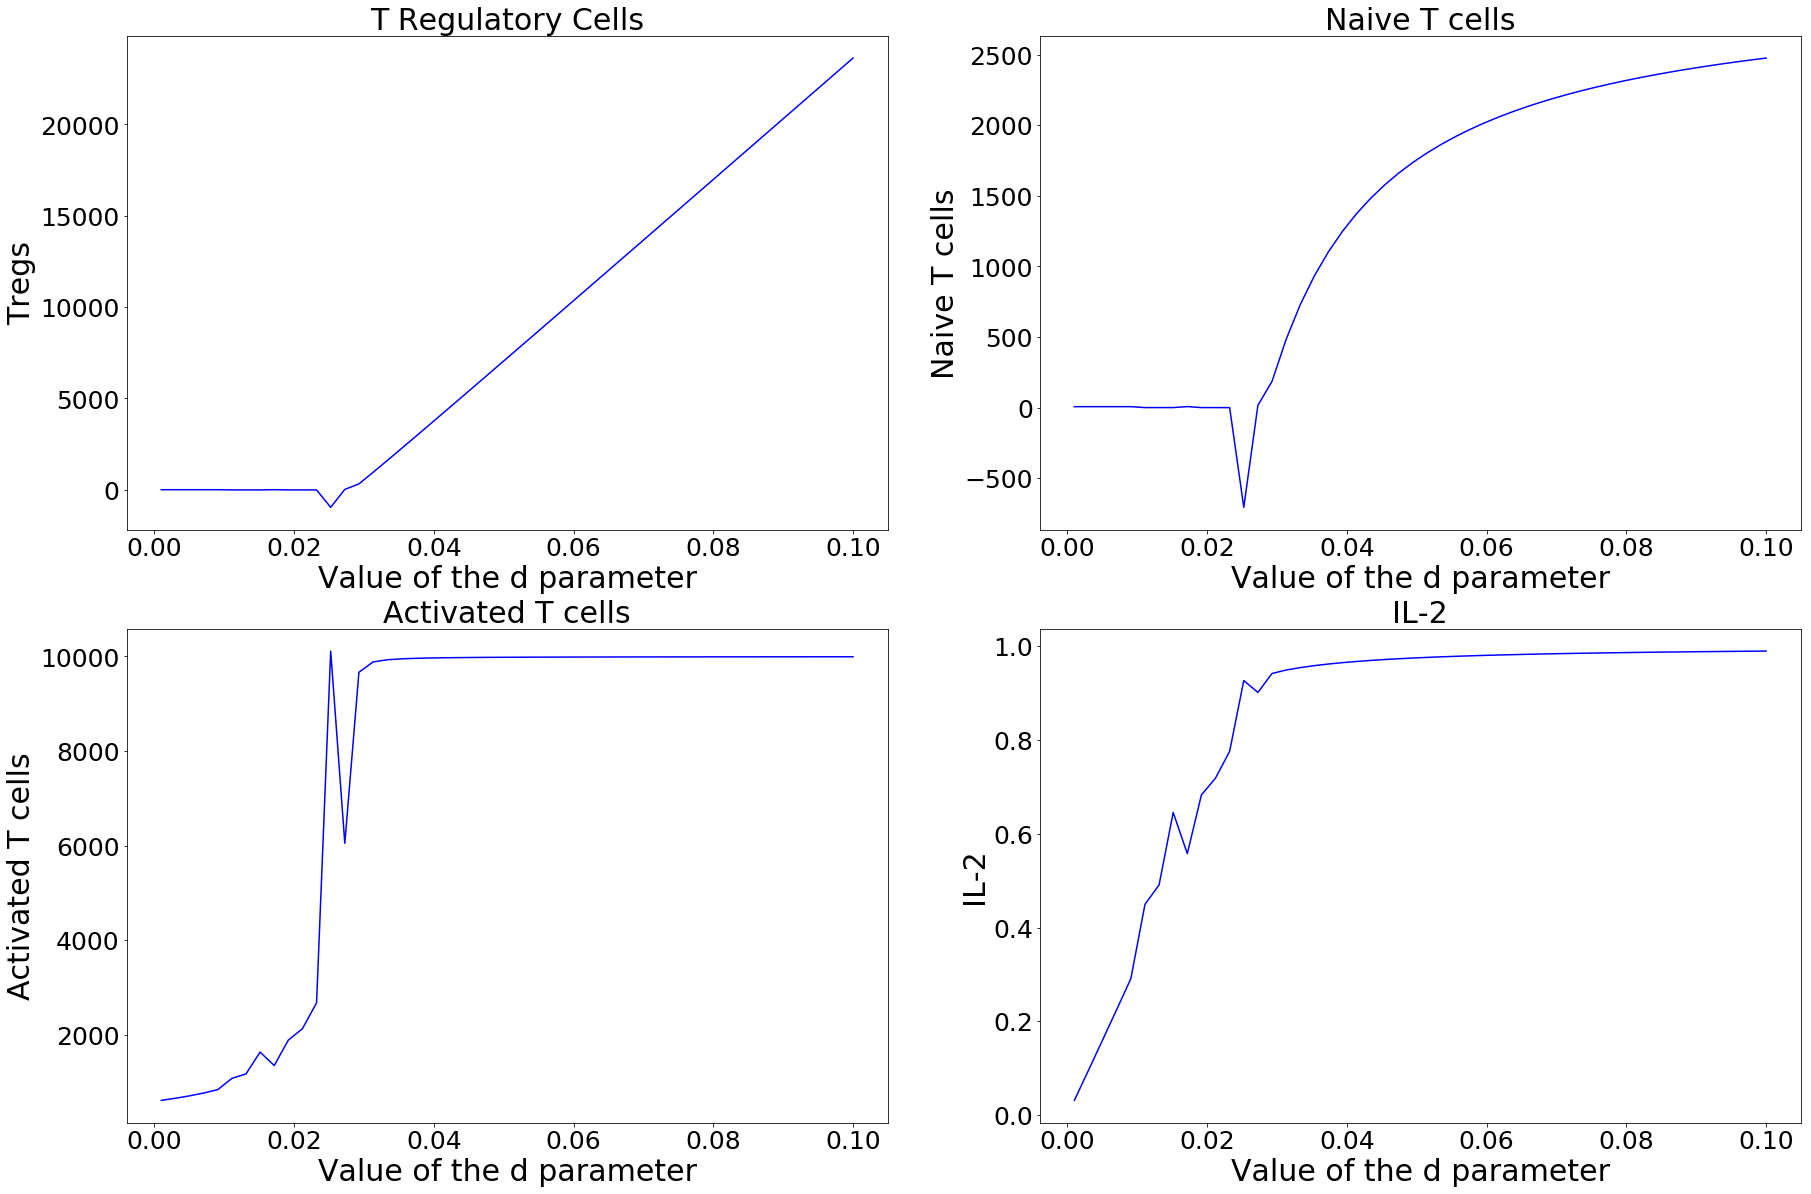

In [98]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the d parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 30)
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)

#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the d parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 30)
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the d parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 30)
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the d parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 30)
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)

plt.show()

# Testing out a more focused range of IL-2 expression 0.02 - 0.04

In [125]:
# A grid of d points to evaluate
dMin = 0.01;
dMax = 0.04; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    d = i #Current value of the d parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

/home/jon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


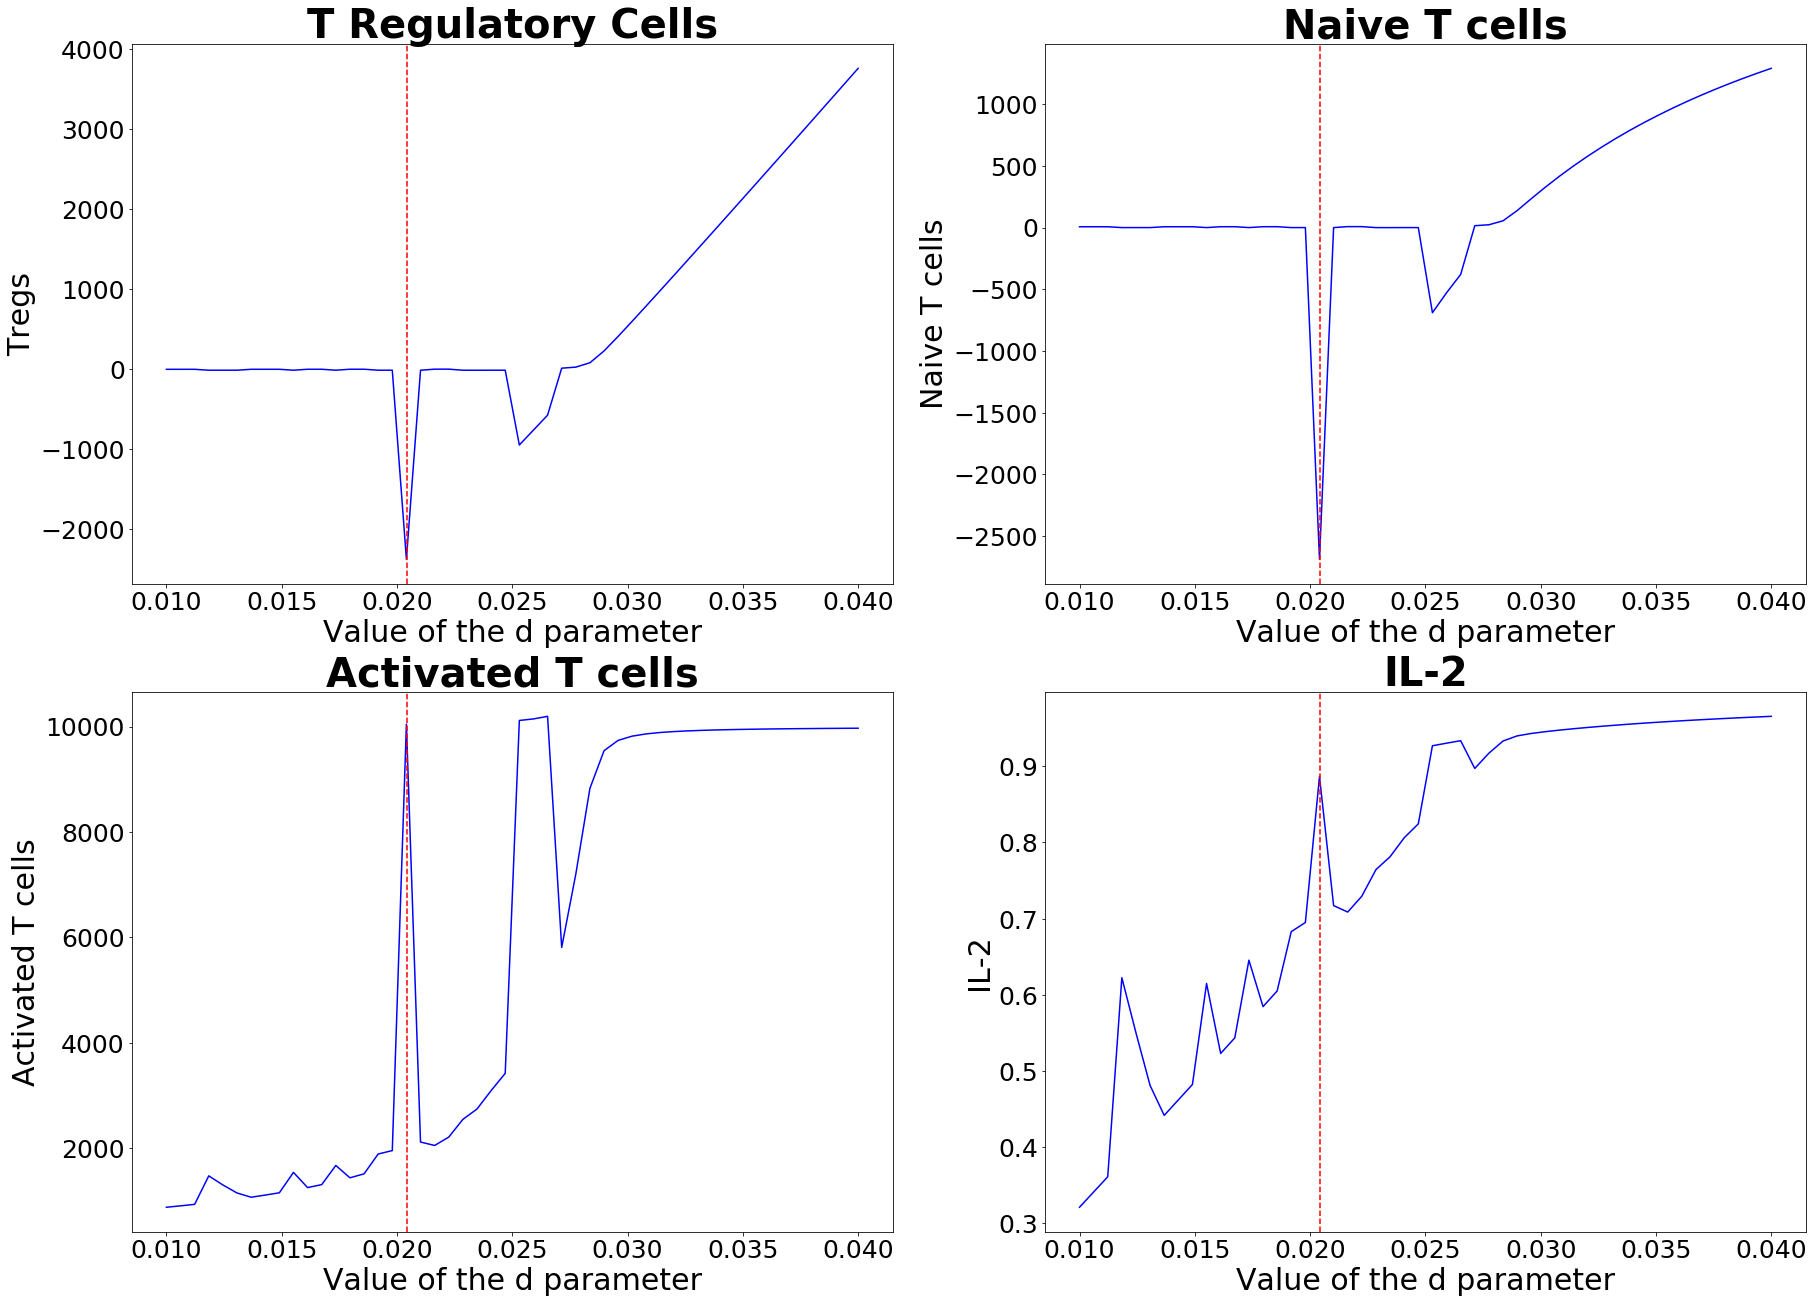

In [132]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the d parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 40, fontweight='bold')
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)
Rp.axvline(x=0.02045, color = 'red' , ls = '--')
# Rp.axhline(y=100, color = 'red' , ls = '--')


#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the d parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 40, fontweight='bold')
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)
Np.axvline(x=0.02045, color = 'red' , ls = '--')

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the d parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 40, fontweight='bold')
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)
Tp.axvline(x=0.02045, color = 'red' , ls = '--')

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the d parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 40, fontweight='bold')
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)
Ip.axvline(x=0.02045, color = 'red' , ls = '--')

fig.subplots_adjust(top = 0.95)
plt.show()

# There is something crazy that is happening at 0.02045 where the dynamic makes the T regulatory cell population 
# Collapse.Well, this is really abnormal behavior that is not biologically relevant
# 
# It seems that the activated T cell population caps out at around 10,000. From the biological data that I have
# collected WT relationship between all T cells and Tregs is 1 in 9. So the parameter that would most accurately
# reflect the data range is 

## Trying to find the parameters that best reflect the data

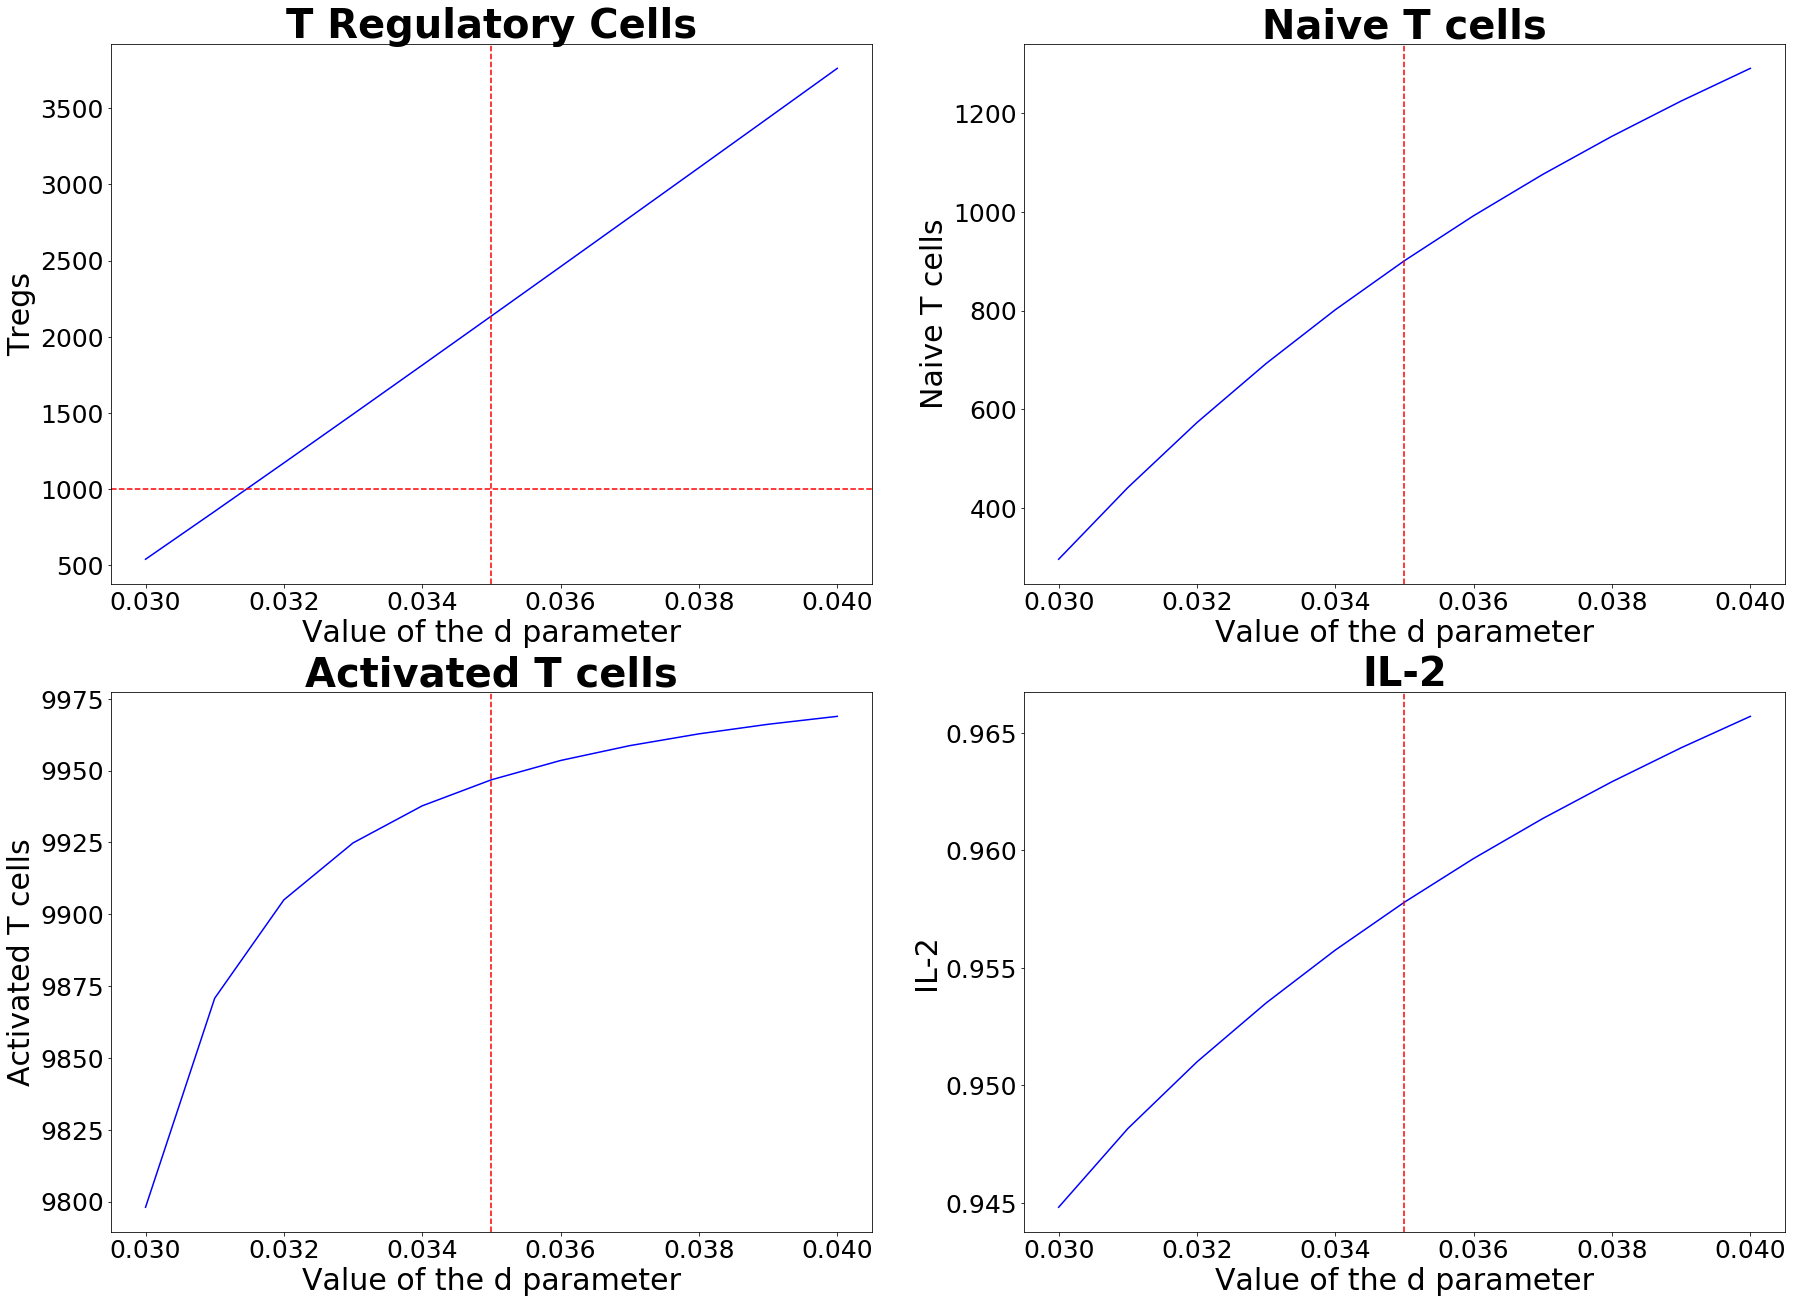

In [57]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the d parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 40, fontweight='bold')
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)
Rp.axvline(x=0.035, color = 'red' , ls = '--')
Rp.axhline(y=1000, color = 'red' , ls = '--')


#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the d parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 40, fontweight='bold')
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)
Np.axvline(x=0.035, color = 'red' , ls = '--')

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the d parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 40, fontweight='bold')
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)
Tp.axvline(x=0.035, color = 'red' , ls = '--')

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the d parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 40, fontweight='bold')
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)
Ip.axvline(x=0.035, color = 'red' , ls = '--')

fig.subplots_adjust(top = 0.95)
plt.show()

# There is something crazy that is happening at 0.02045 where the dynamic makes the T regulatory cell population 
# Collapse.Well, this is really abnormal behavior that is not biologically relevant
# 
# It seems that the activated T cell population caps out at around 10,000. From the biological data that I have
# collected WT relationship between all T cells and Tregs is 1 in 9. So the parameter that would most accurately
# reflect the data range is 0.03 and 0.035

In [18]:
dMin = 0.01;
dMax = 0.03; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)
dRange = np.around(dRange, 3)

In [6]:
# A grid of d points to evaluate
dMin = 0.03;
dMax = 0.06; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)
dRange = np.around(dRange, 3)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    d = i #Current value of the d parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

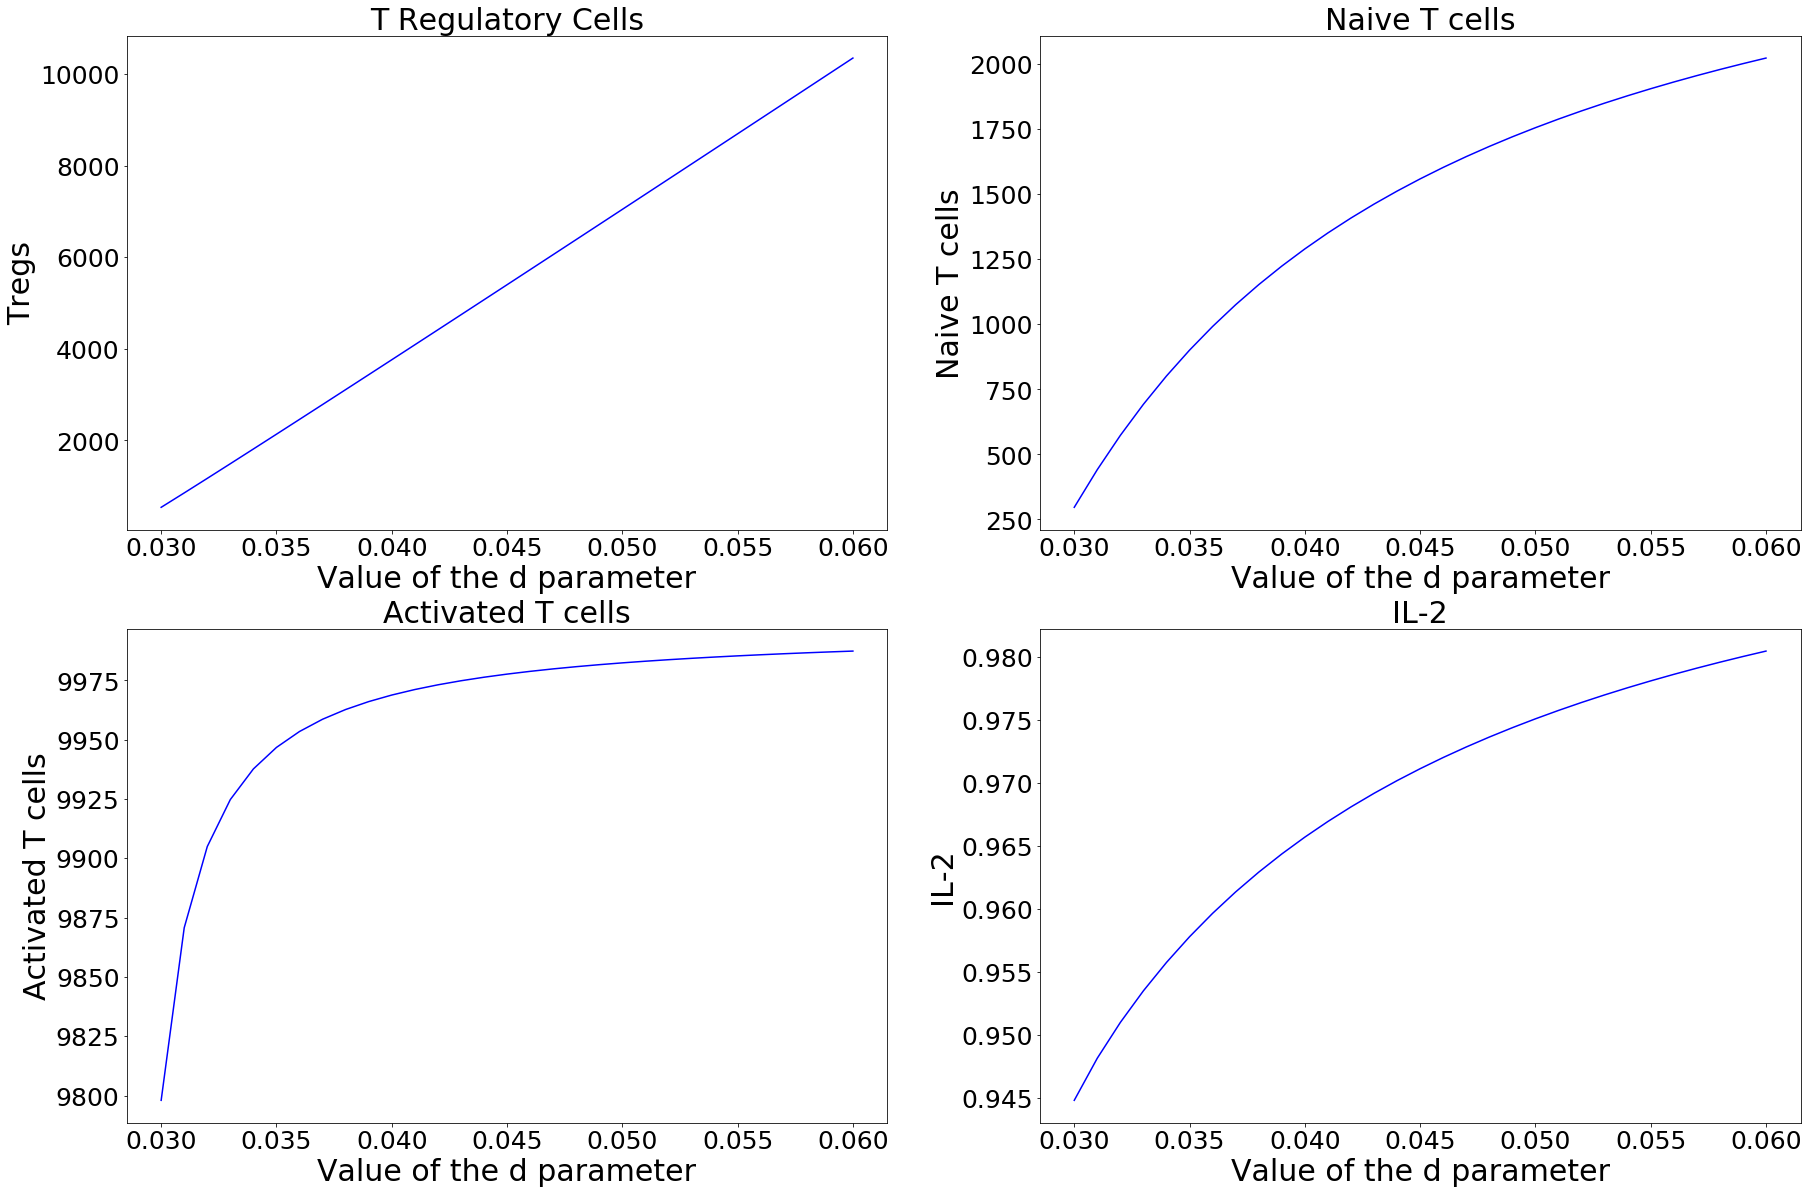

In [7]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the d parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 30)
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)

#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the d parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 30)
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the d parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 30)
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the d parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 30)
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)

plt.show()

In [8]:
[alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
[0.006, 1, 1, 1, 0.1, 0.01, 0.1, 60, 10, 1, 0.01, 0.1, 0.03, 0.03, 1, 10, 1, 0.034]

[0.006,
 1,
 1,
 1,
 0.1,
 0.01,
 0.1,
 60,
 10,
 1,
 0.01,
 0.1,
 0.03,
 0.03,
 1,
 10,
 1,
 0.06]